In [1]:
# Installing dependencies
import pickle
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/tmp/ipykernel_30382/2187110114.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Fetching dataset
with open('dry_bean_dataset.pkl', 'rb') as file:
    dry_bean_dataset = pickle.load(file)
with open('best_rf_clf.pkl', 'rb') as file:
    best_rf_clf = pickle.load(file)

In [3]:
# Sorting features by importance provided by the optimal random forest
features_dict = dict(enumerate(best_rf_clf.feature_importances_))
features_list = sorted(features_dict.items(), key = lambda item: item[1], reverse = True)
features_list

[(12, 0.13230804437680288),
 (3, 0.118051185681012),
 (1, 0.10762157150574396),
 (2, 0.08278332803380323),
 (14, 0.08275502212997302),
 (6, 0.08165018790808792),
 (11, 0.07042410808450564),
 (0, 0.054619880158169064),
 (7, 0.05132170914854989),
 (10, 0.04605925332177904),
 (4, 0.04584008675080864),
 (5, 0.04579069570237461),
 (13, 0.03730649937784407),
 (15, 0.02338449756405622),
 (9, 0.014191831163927436),
 (8, 0.005892099092562411)]

In [7]:
# Splitting dataset in training (70%) and test (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(dry_bean_dataset.data.features, dry_bean_dataset.data.targets, test_size=0.3, random_state=42)
y_train = np.ravel(y_train)

In [5]:
# Defining the hyperparameter distribution for grid search
param_grid = {
    'C': [1, 5, 20, 50, 100, 250, 500],
    'gamma': [0.01, 0.5, 1, 2, "scale"],
    'kernel': ['rbf', 'sigmoid']}

In [6]:
# Setting the random search
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
features_train = []
results_df1 = pd.DataFrame(columns = ['C', 'gamma', 'kernel'])
results_df2 = pd.DataFrame(columns = ['Precision', 'Recall', 'F1 score', 'Accuracy', 'Feature added'])

for feature_index, feature_importance in features_list: # Feeding new features by importance in each interation
    
    # Optimizing the hyperparameters
    features_train.append(feature_index)
    X_train_temp = X_train.iloc[:,features_train]
    grid_search.fit(X_train_temp, y_train)
    best_svc = grid_search.best_estimator_
    results_df1.loc[len(features_train)] = [best_svc.get_params()[key] for key in ['C', 'gamma', 'kernel']]

    # Evaluating the model
    y_pred = best_svc.predict(X_test.iloc[:,features_train])
    precision = round(precision_score(y_test, y_pred, average='weighted'), 4)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 4)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    feature = dry_bean_dataset.data.features.columns[feature_index]
    results_df2.loc[len(features_train)] = [precision, recall, f1, accuracy, feature]

results_df = pd.concat([results_df1, results_df2], axis = 1)
results_df

Fitting 5 folds for each of 70 candidates, totalling 350 fits


/home/students/jchinchilla/miniforge3/envs/matrix/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits


,C,gamma,kernel,Precision,Recall,F1 score,Accuracy,Feature added
1,50,scale,rbf,0.5202,0.5902,0.5391,0.5902,ShapeFactor1
2,100,2,rbf,0.5485,0.5786,0.5449,0.5786,MinorAxisLength
3,500,scale,rbf,0.8557,0.8538,0.8481,0.8538,Perimeter
4,250,scale,rbf,0.9131,0.9126,0.9127,0.9126,MajorAxisLength
5,250,scale,rbf,0.9129,0.9124,0.9124,0.9124,ShapeFactor3
6,500,scale,rbf,0.7329,0.6963,0.6626,0.6963,ConvexArea
7,500,scale,rbf,0.7305,0.6948,0.6605,0.6948,Compactness
8,500,scale,rbf,0.6953,0.6911,0.6643,0.6911,Area
9,500,scale,rbf,0.6936,0.6899,0.6626,0.6899,EquivDiameter
10,500,scale,rbf,0.6915,0.6882,0.6604,0.6882,Roundness


Without doubt, best hyperparameters are {'C': 250, 'gamma': 'scale', 'kernel': 'rbf'}. In line with the results of the k neighbors algorithm, again only the first four features are really informative to provide the highest possible metrics. Again, is the model performance changing when eliminating either 'ShapeFactor1' or 'MinorAxisLength'?

In [30]:
# Evaluating the model performance when eliminating either 'ShapeFactor1' or 'MinorAxisLength'?
results_df1 = pd.DataFrame(columns = ['C', 'gamma', 'kernel'])
results_df2 = pd.DataFrame(columns = ['Precision', 'Recall', 'F1 score', 'Accuracy', 'Feature eliminated'])
feature_eliminated = ['MinorAxisLength', 'ShapeFactor1']

for i, j in enumerate([['ShapeFactor1', 'Perimeter', 'MajorAxisLength'], ['MinorAxisLength', 'Perimeter', 'MajorAxisLength']]):
    
    # Optimizing the hyperparameters
    X_train_temp = X_train.loc[:,j]
    grid_search.fit(X_train_temp, y_train)
    results_df1.loc[i] = grid_search.best_params_

    # Evaluating the model
    best_svm_clf = grid_search.best_estimator_
    y_pred = best_svm_clf.predict(X_test.loc[:,j])
    precision = round(precision_score(y_test, y_pred, average='weighted'), 4)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 4)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    feature = feature_eliminated[i]
    results_df2.loc[i] = [precision, recall, f1, accuracy, feature]

results_df = pd.concat([results_df1, results_df2], axis = 1)
results_df

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits


,C,gamma,kernel,Precision,Recall,F1 score,Accuracy,Feature eliminated
0,500,scale,rbf,0.8911,0.8902,0.8903,0.8902,MinorAxisLength
1,100,scale,rbf,0.9131,0.9126,0.9127,0.9126,ShapeFactor1


Removing the most important feature does not compromise the predictive scores while enhancing the computational efficiency. Again, the model is robust. Notice that C (regularization) decreases, which makes sense as the three features remaining are highly correlated.

In [34]:
# Training the optimal SVM classifier
best_svm_clf = SVC(C = 100, gamma = 'scale', kernel = 'rbf')
X_train_temp = X_train.loc[:,['MinorAxisLength', 'Perimeter', 'MajorAxisLength']]
best_svm_clf.fit(X_train_temp, y_train)
results_df.loc[1]

C                              100
gamma                        scale
kernel                         rbf
Precision                   0.9131
Recall                      0.9126
F1 score                    0.9127
Accuracy                    0.9126
Feature eliminated    ShapeFactor1
Name: 1, dtype: object

In [35]:
# Evaluating the model by classes
X_test_temp = X_test.loc[:,['MinorAxisLength', 'Perimeter', 'MajorAxisLength']]
y_pred = best_svm_clf.predict(X_test_temp)
results_df_class = pd.DataFrame(columns = sorted(set(y_test['Class'])))
results_df_class.loc['Precision'] = np.around(precision_score(y_test, y_pred, average=None), decimals = 4)
results_df_class.loc['Recall'] = np.around(recall_score(y_test, y_pred, average=None), decimals = 4)
results_df_class.loc['F1 score'] = np.around(f1_score(y_test, y_pred, average=None), decimals = 4)
results_df_class

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Precision,0.9266,1.0,0.8988,0.9087,0.9591,0.9430,0.8483
Recall,0.8611,1.0,0.9387,0.9249,0.9331,0.9369,0.8557
F1 score,0.8927,1.0,0.9183,0.9167,0.9459,0.9399,0.8520


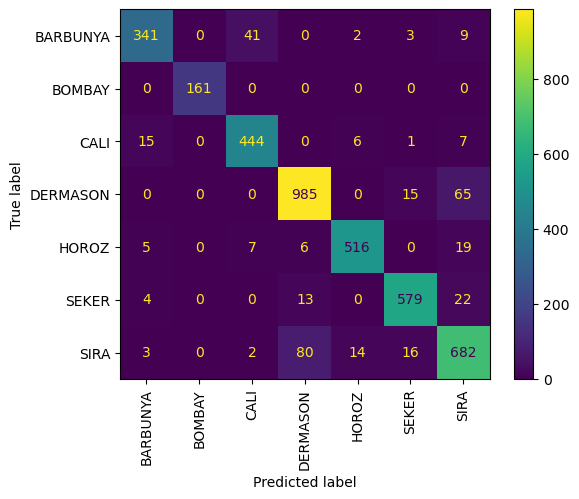

In [37]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test['Class'])))
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [38]:
# Saving optimal k-neighbors classifier
with open('best_svm_clf.pkl', 'wb') as file:
    pickle.dump(best_svm_clf, file)